# Money Flow Index
- Money Flow Index (MFI) เป็นดัชนีที่ช่วยวิเคราะห์แรงซื้อและขายในตลาด โดยใช้ข้อมูลจากทั้งราคาและปริมาณการซื้อขาย การคำนวณนี้สามารถบ่งบอกถึงการเคลื่อนไหวของเงินที่ไหลเข้าและออกจากสินทรัพย์ในช่วงเวลาหนึ่ง ๆ ได้

In [2]:
import sys
import os

# กำหนด path ไปยังโฟลเดอร์ 'libs' ที่อยู่ข้างนอกของ 'subfolder'
# ใช้ os.path.abspath สำหรับการรับ absolute path
libs_path = os.path.abspath(os.path.join(os.getcwd(), '..', ''))

# ใส่ path นี้ไปที่ตำแหน่งแรกใน sys.path เพื่อให้ Python ค้นหาที่นี่ก่อน
if libs_path not in sys.path:
    sys.path.insert(0, libs_path)

import starfishXapi as sx
from starfishXapi.set_api import indexType
sx.enable_autoreload()
print(sx.__version__)

Autoreload enabled.
0.00104


In [4]:
# สร้าง object dataReader
dataReader = sx.HistStockPrice()
dataReader.openLog(directory='cache/') # สร้าง folder cache/

*you are using nologin method, data you access may be limited


False

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

start_date = '2024-01-01'
stop_date = '2024-09-12'  
folder = 'cache/'

symbol = 'dusit'
df = dataReader.getPrice(symbol,start=start_date,stop=stop_date,cache=True)
df.tail(5)

open  high   low  close    volume
Date                                         
2024-09-20  12.2  12.3  11.9   12.1  935402.0
2024-09-23  12.1  12.3  11.9   12.1  409006.0
2024-09-24  12.2  12.3  12.0   12.3  419156.0
2024-09-25  12.3  12.4  12.1   12.3  427210.0
2024-09-26  12.2  12.2  11.9   12.2  419031.0

ตัวอย่างผลลัพธ์
![image](indicator_images/p1.png)

![image](indicator_images/p2.png)

![image](indicator_images/p3.png)

In [271]:
# step1
df['TP'] = (df['high']+df['low']+df['close']) / 3

In [273]:
# step2
df['Raw_Money_Flow'] = df['TP']*df['volume']

In [275]:
# step3
df['TPprev'] = df['TP'].shift(1)
df['Positive_Money_Flow'] = np.where(df['TP'] > df['TPprev'],df['Raw_Money_Flow'],0)
df['Negative_Money_Flow'] = np.where(df['TP'] < df['TPprev'],df['Raw_Money_Flow'],0)

In [277]:
# step4
df['Money_Flow_Ratio'] = df['Positive_Money_Flow'].rolling(window=14).mean() / df['Negative_Money_Flow'].rolling(window=14).mean()

In [279]:
# step5
df['MFI'] = 100 - (100 / (1 + df['Money_Flow_Ratio']))

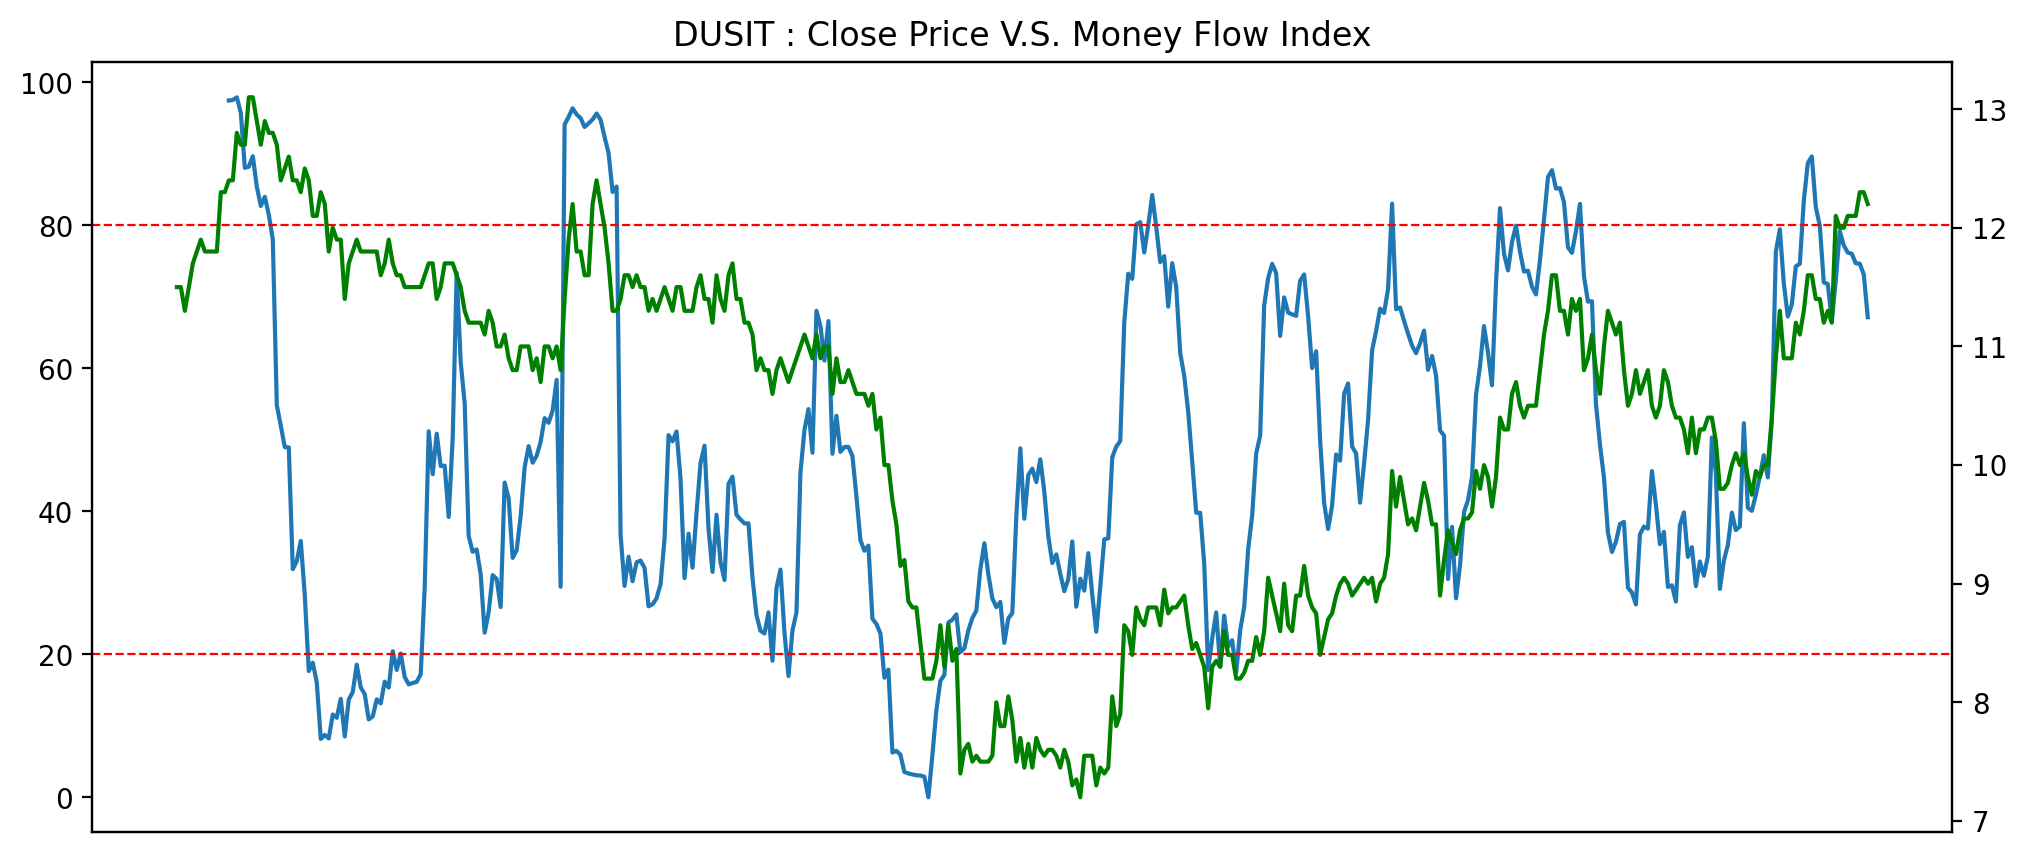

In [281]:
fig , ax1 = plt.subplots(figsize=(12,5))
ax1.plot(df.index,df['MFI'])
ax1.set_title(f'{symbol.upper()} : Close Price V.S. Money Flow Index')
ax1.set_xticks([])

ax1.axhline(80,linewidth=0.8,linestyle='--',color='red')
ax1.axhline(20,linewidth=0.8,linestyle='--',color='red')

ax2 = ax1.twinx()

ax2.plot(df.index,df['close'],color='green')
ax2.set_xticks([])
plt.show()